# Tarea 3

Diego Lozoya Morales | 745345

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy import stats
import statsmodels.formula.api as smf
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

# Data

In [2]:
df = pd.read_csv('Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Variable dependiente

In [3]:
target = 'cnt'
y = df[target]

# Limpieza de datos

In [4]:
df = df.drop(columns=["casual", "registered", "instant", "dteday", "mnth", "yr"])
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Función

In [5]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.figure(figsize=(10, 5))
    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o", color=colors[0])
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o", color=colors[1])
    plt.xlabel("Prediccion")
    plt.ylabel("Real")
    plt.title("Calibración")
    plt.grid()
    plt.legend()
    plt.show()

# 1)

## Análisis vibariado por variable

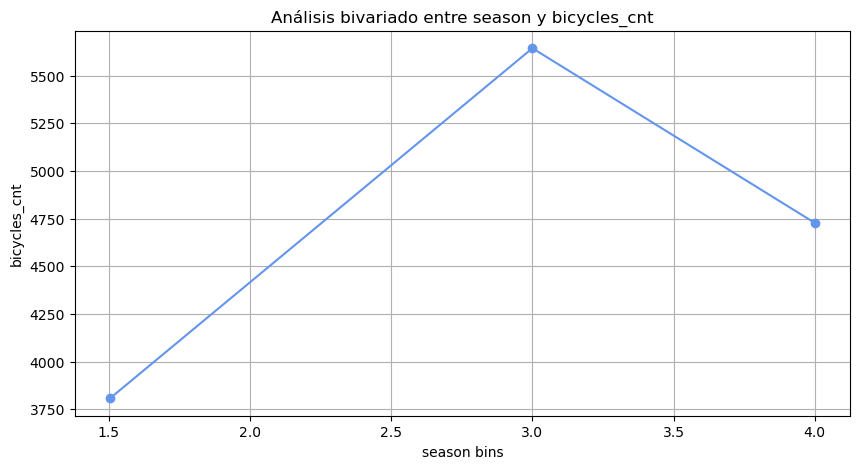

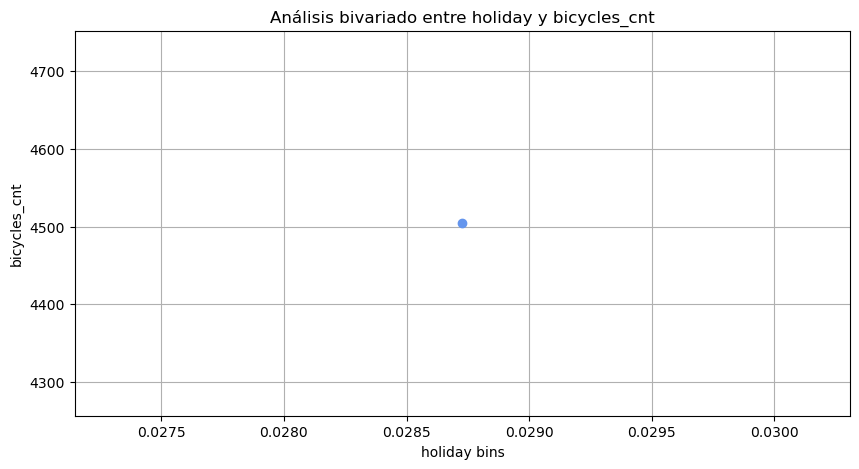

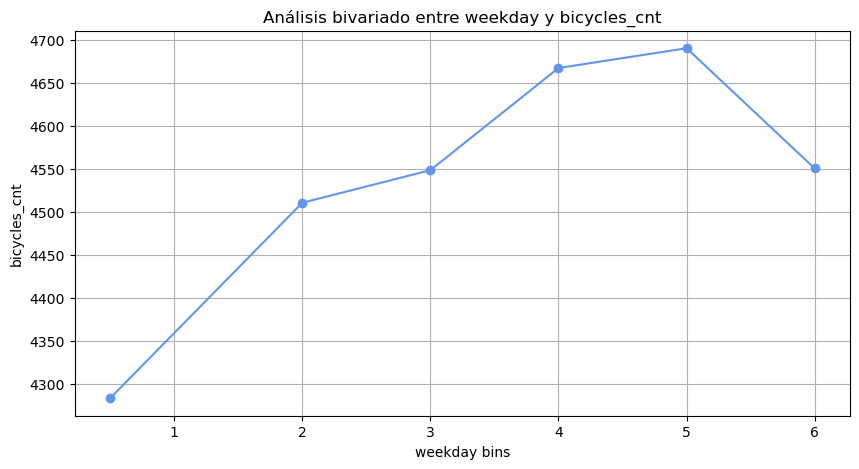

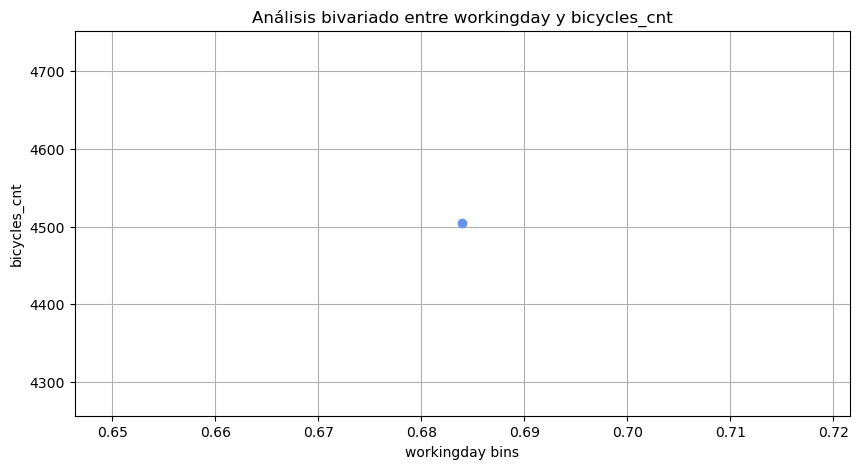

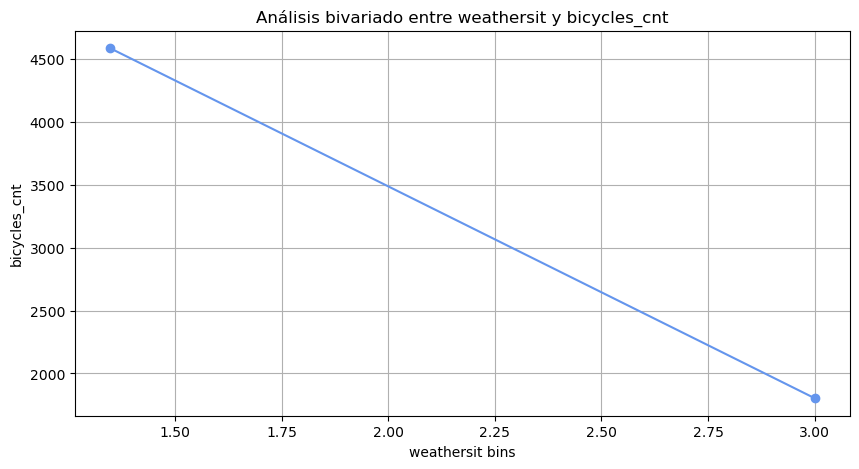

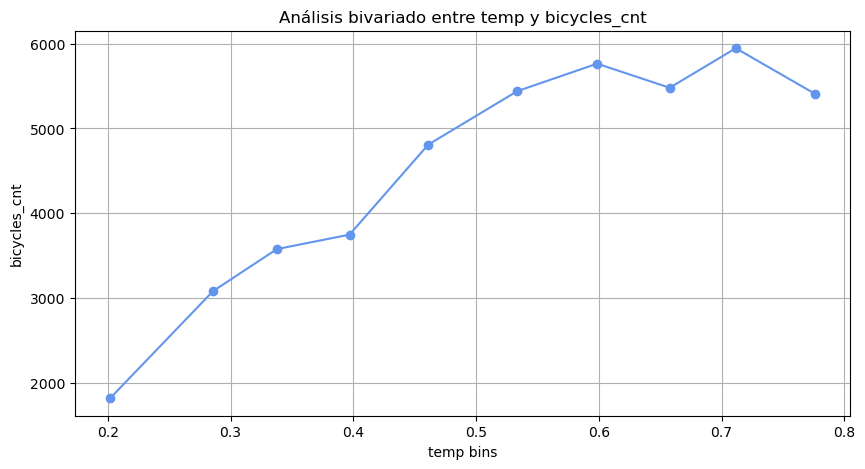

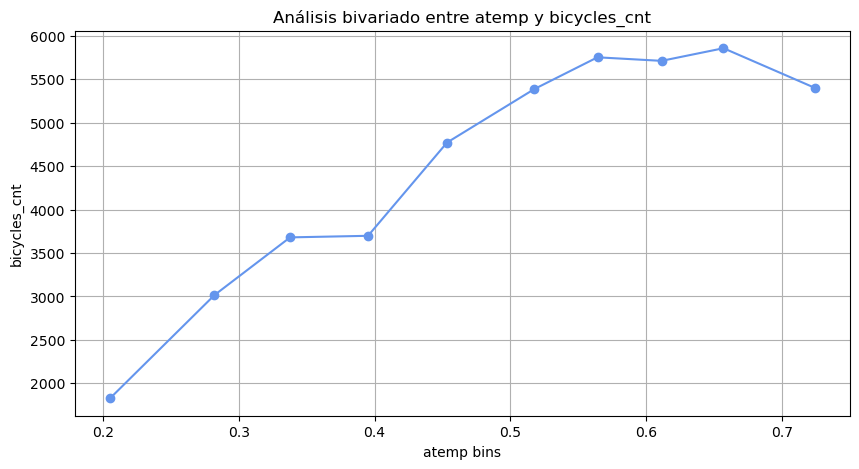

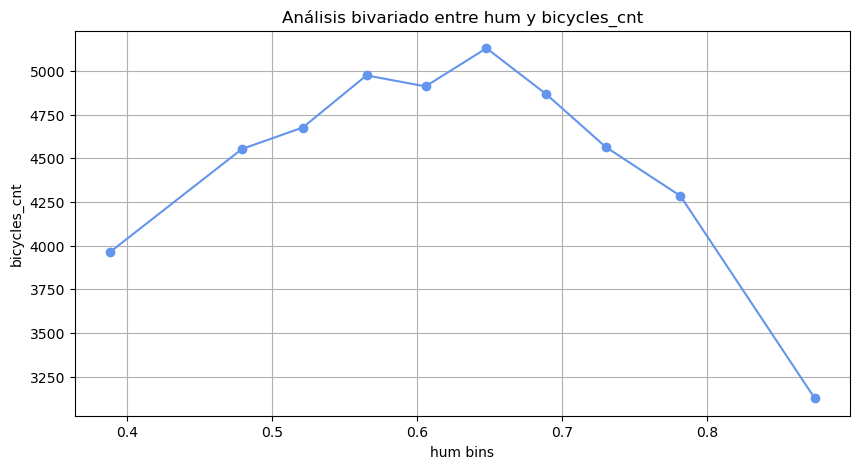

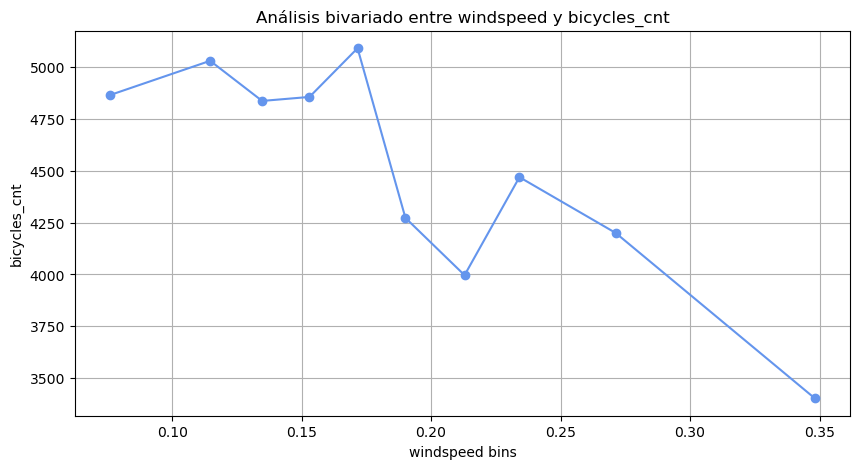

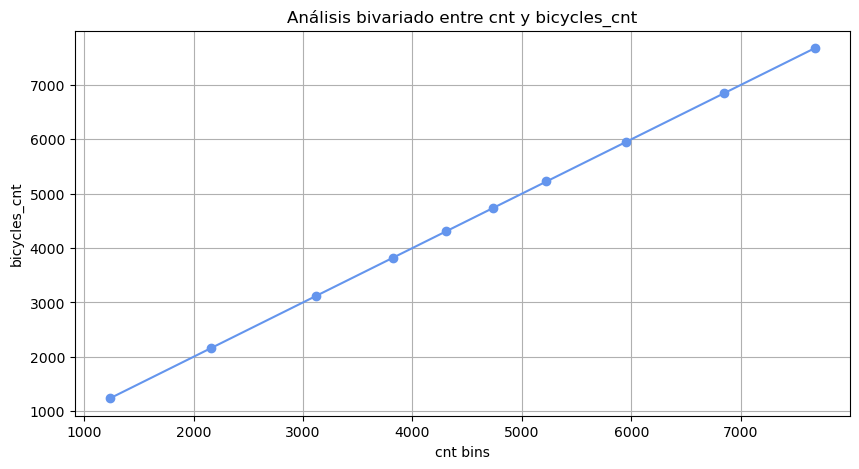

In [6]:
for i in df.keys():
     X = df[[i]]
     model = linear_model.LinearRegression().fit(X, y)

     if len(X.iloc[:, 0].unique()) < 5:
          q = len(X.iloc[:, 0].unique())
     else:
          q = 10

     df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=q, labels=False, duplicates="drop") + 1
     grouped = df.groupby((X.keys()[0] + str("bin"))).mean()

     plt.figure(figsize=(10,5))
     plt.plot(grouped[X.keys()[0]].values, grouped.cnt.values, color=colors[0], marker='o')
     plt.xlabel(f"{X.keys()[0]} bins")
     plt.ylabel("bicycles_cnt")
     plt.title(f"Análisis bivariado entre {X.keys()[0]} y bicycles_cnt")
     plt.grid()
     plt.show()

     df = df.drop(columns=[X.keys()[0] + str("bin")])

     print()

## Scale

In [7]:
X = df.copy().drop(target, axis=1)
X = pd.get_dummies(X, columns=["season", "weekday", "weathersit"])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Regresión lineal múltiple

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression().fit(X_train, y_train)
predicciones_RLM = model.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=predicciones_RLM)
print(f"R² Score: {r2:,.4f}")

mse = mean_squared_error(y_true=y_test, y_pred=predicciones_RLM)
print(f"MSE: {mse:,.4f}")

coeficientes = pd.DataFrame({
     'names': X.keys(),
     'coeficientes': model.coef_
})

print()
print(f"Intercepto del modelo: {model.intercept_:,.2f}\nCoeficientes del modelo:")
display(coeficientes)

R² Score: 0.5542
MSE: 1,787,468.3831

Intercepto del modelo: 1,759,890,484,875,003.00
Coeficientes del modelo:


,names,coeficientes
0,holiday,1.899126e+16
1,workingday,1.899126e+16
2,temp,6.551497e+03
3,atemp,-1.402078e+02
4,hum,-2.376887e+03
5,windspeed,-2.734952e+03
6,season_1,9.718099e+14
7,season_2,9.718099e+14
8,season_3,9.718099e+14
9,season_4,9.718099e+14


### Calibración

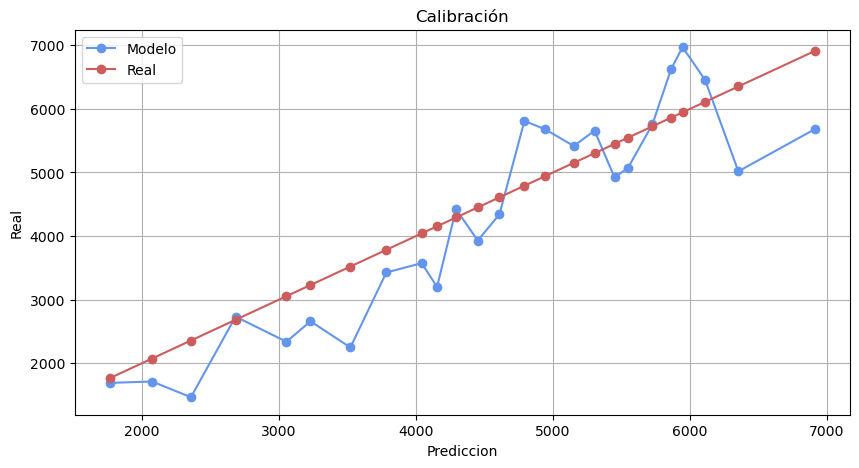

In [9]:
calibracion(predicciones_RLM, y_test, 25)

## Polinomio grado 2

In [10]:
degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = linear_model.Lasso().fit(X_train, y_train)
predicciones_poly2 = model.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=predicciones_poly2)
print(f"R² Score: {r2:,.4f}")

mse = mean_squared_error(y_true=y_test, y_pred=predicciones_poly2)
print(f"MSE: {mse:,.4f}")

R² Score: 0.5653
MSE: 1,743,254.2898


### Calibración

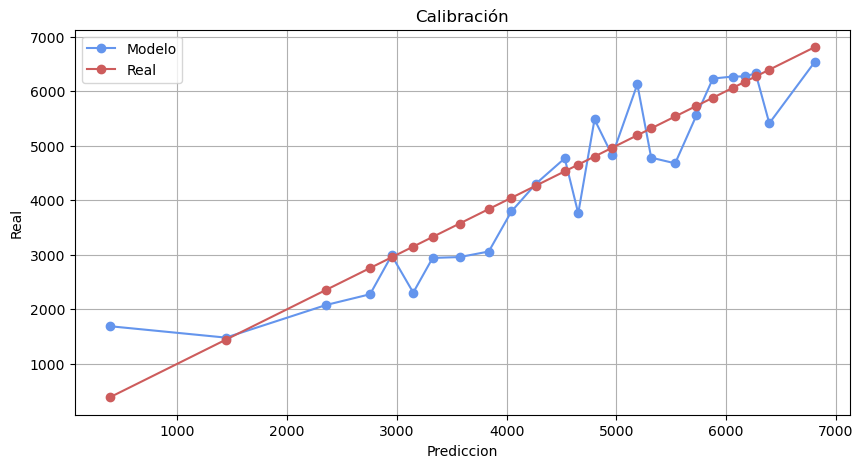

In [11]:
calibracion(predicciones_poly2, y_test, 25)

## Polinomio grado 3

In [12]:
degree = 3

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = linear_model.Lasso().fit(X_train, y_train)
predicciones_poly3 = model.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=predicciones_poly3)
print(f"R² Score: {r2:,.4f}")

mse = mean_squared_error(y_true=y_test, y_pred=predicciones_poly3)
print(f"MSE: {mse:,.4f}")

R² Score: 0.2948
MSE: 2,827,714.1139


### Calibración

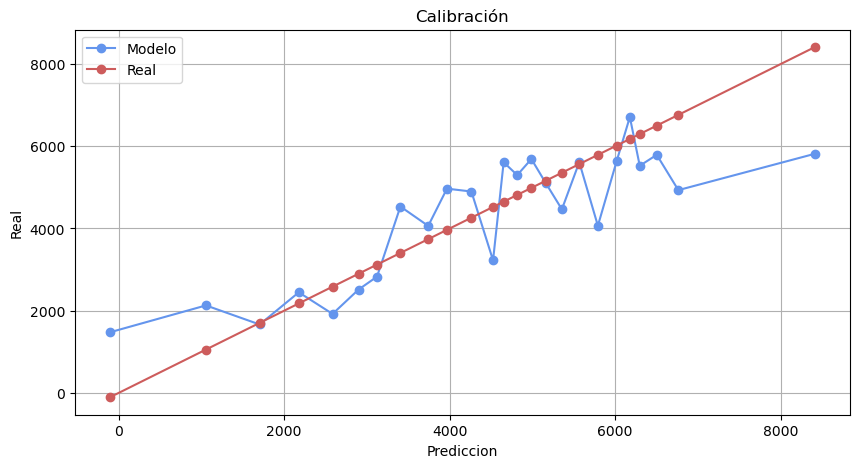

In [13]:
calibracion(predicciones_poly3, y_test, 25)

## Comparación de modelos

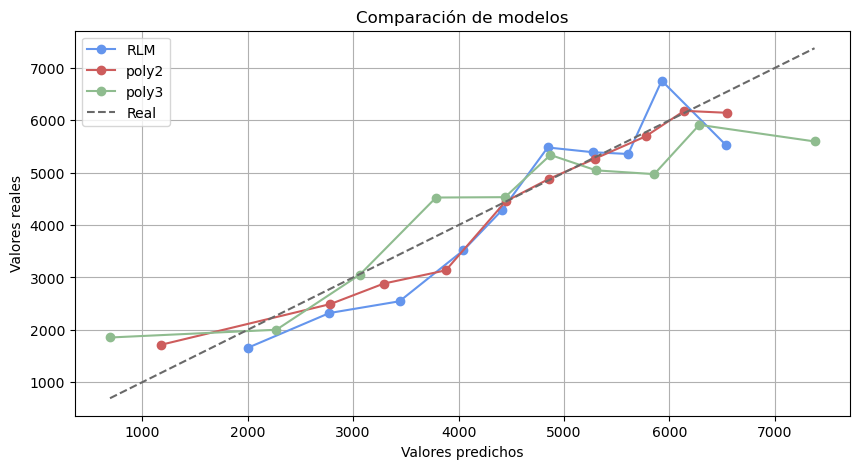

In [14]:
modelos = ['RLM', 'poly2', 'poly3']

plt.figure(figsize=(10, 5))

for i, modelo in enumerate(modelos):
     col_pred = f'predicciones_{modelo}'

     df_calibracion = pd.DataFrame({
          'predicciones': globals()[col_pred],
          'y': y_test
     })

     df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=10, labels=False)+1
     grouped = df_calibracion.groupby('bins').mean()
     plt.plot(grouped['predicciones'].values, grouped['y'].values, marker='o', color=colors[i], label=modelos[i])

plt.plot(grouped['predicciones'].values, grouped['predicciones'].values, color=colors[4], linestyle="--", label="Real")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Comparación de modelos")
plt.grid()
plt.legend()
plt.show()

## Conclusión

En un inició se trato de hacer los modelos con base en los datos crudos, sin embargo solo el modelo RLM presentaba un ajuste aceptable. Los polinomiales obtenían un R2 negativo, demasiado elevado en magnitud. Al ver estos resultados, se optó por aplicar un escalador de valores, con el fin de obtener mejores resultados.  

Una vez teniendo los datos escalados se volvió a calcular de nuevo todos los modelos, de los cuales, el que tuvo un mejor ajuste fue el polinomial de grado 2, obteniendo un R2 de 0.5653, seguido muy de cerca por el modelo RLM (0.5542) y finalmente el polinomial grado 3 (0.2948). Como se puede ver, este último modelo (poly3) presenta un sobreajuste, ya que su R2 disminuye considerablemente en comparación con el de un grado menor. 

# 2)

## Función

In [15]:
def AB_test(test, control):
    # Mu
    mu_test = test.mean()
    mu_control = control.mean()

    # SE
    se_test = test.sem()
    se_control = control.sem()

    # Differences
    mu_diff = mu_control - mu_test
    se_diff = np.sqrt((test.var() / len(test) + (control.var() / len(control))))

    # Z score and p value 
    z = mu_diff / se_diff

    p_value = stats.norm.cdf(z)

    print(f"Intervalo variable test: ({mu_test - 2*se_test:,.4f}, {mu_test + 2*se_test:,.4f})")
    print(f"Intervalo variable control: ({mu_control - 2*se_control:,.4f}, {mu_control + 2*se_control:,.4f})")
    print(f'Intervalo de confianza del efecto causal: ({mu_diff - 2*se_diff:,.4f}, {mu_diff + 2*se_diff:,.4f})')
    print(f"Z score {z:,.4f}")
    print(f"P-value {p_value:,.4f}")

## Data

In [16]:
holiday = df[df['holiday'] == 1].cnt
workingday = df[df['workingday'] == 1].cnt

## AB testing manual

In [17]:
AB_test(holiday, workingday)

Intervalo variable test: (2,817.0225, 4,652.9775)
Intervalo variable control: (4,416.8094, 4,752.8306)
Intervalo de confianza del efecto causal: (-83.4057, 1,783.0457)
Z score 1.8213
P-value 0.9657


## AB testing con función

In [18]:
result = smf.ols('cnt ~ holiday + workingday', data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4389.6857,133.413,32.903,0.000,4127.766,4651.605
holiday,-654.6857,442.480,-1.480,0.139,-1523.375,214.004
workingday,195.1343,158.980,1.227,0.220,-116.979,507.248


El AB testing nos indica que el intervalo de bicicletas rentadas en días festivos es de 2,817 a 4,652. Por otro lado, en días hábiles este intervalo se modifica de 4,416 a 4,752 bicicletas. El intervalo de días festivos es demasiado grande, no obstante se puede definir que según los intervalos calculados, se espera un mayor número de renta de bicicletas en días hábiles, aunque esto no es 100% probable. El intervalo de confianza del efecto casual va de -83 a 1,783. Ya que el 0 se encuentra dentro del intervalo, podría decirse que no hay suficiente evidencia estádistica de si el impacto de la renta de bicicletas en días festivos es positivo o negativo. Esto se ve respaldado con el Z score (1.8213) y el P-value (0.9657). Tener una Z cercana a 2 y un P-value por encima de 0.05 indíca que con un 95% de confianza no existe evidencia suficiente para afirmar que existe una diferencia entre las bicicletas rentadas en días festivos y días hábiles. 

De manera individual, ambas variables tienen un P-value mayor a 0.05, lo que indica que no tienen una influencia estadísticamente significativa en la construcción de modelos para la predicción de bicicletas rentadas. 